<a href="https://colab.research.google.com/github/Manya123-max/Deep-Learning-Algorithms-/blob/main/DL_7_StackedAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# prompt: load mnist dataset

import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# You can now use x_train, y_train, x_test, and y_test for training and evaluating your model.
# For example, you can print the shape of the training data:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [ ]:
# prompt: normalize the pixel values

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:



# Reshape the images into vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print("x_train shape after reshaping:", x_train.shape)
print("x_test shape after reshaping:", x_test.shape)

x_train shape after reshaping: (60000, 784)
x_test shape after reshaping: (10000, 784)


In [ ]:
# prompt: encoding yhe data

from tensorflow.keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded vectors
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print("y_train shape after encoding:", y_train_encoded.shape)
print("y_test shape after encoding:", y_test_encoded.shape)

y_train shape after encoding: (60000, 10)
y_test shape after encoding: (10000, 10)


In [ ]:
input_img=Input(shape=(784,))
encded1=Dense(128,activation='relu')(input_img)
encoded2=Dense(64,activation='relu')(encded1)
encoded3=Dense(32,activation='relu')(encoded2)
decoded1 = Dense(64, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)
decoded3 = Dense(784, activation='sigmoid')(decoded2)

In [ ]:
# Define the autoencoder to output the final decoded layer (decoded3)
autoencoder1 = Model(input_img, decoded3)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder1.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.3381 - val_loss: 0.1695
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.1609 - val_loss: 0.1377
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.1355 - val_loss: 0.1257
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1248 - val_loss: 0.1179
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.1177 - val_loss: 0.1133
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1138 - val_loss: 0.1102
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1111 - val_loss: 0.1078
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1082 - val_loss: 0.1054
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1063 - val_loss: 0.1035
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1044 - val_loss: 0.1021


In [ ]:
# prompt: get the encoded representation from the first auto encoder

encoder = Model(input_img, encoded3)
encoded_imgs = encoder.predict(x_test)
encoded_imgs

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 5.084236 , 14.848971 ,  6.7232223, ..., 11.253598 ,  8.774626 ,
         0.       ],
       [ 1.2527723,  9.605255 ,  6.7235637, ...,  4.547772 ,  7.3869925,
         0.       ],
       [ 9.194863 , 14.773658 ,  5.444077 , ...,  4.408006 , 11.783128 ,
         0.       ],
       ...,
       [14.34295  , 20.90901  ,  7.265146 , ..., 12.985507 ,  7.2918096,
         0.       ],
       [ 5.3625817, 14.336704 ,  2.2502003, ..., 13.653349 , 11.095688 ,
         0.       ],
       [12.304641 , 18.843899 , 10.284166 , ...,  7.1246295,  7.7131915,
         0.       ]], dtype=float32)

In [ ]:
# prompt: prediction on train and test data

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ... (your existing code)

# Predict on training data
train_predictions = autoencoder1.predict(x_train)

# Predict on testing data
test_predictions = autoencoder1.predict(x_test)

# Print shapes of the predictions
print("Train Predictions Shape:", train_predictions.shape)
print("Test Predictions Shape:", test_predictions.shape)

# Example: Print first 5 predictions
print("\nFirst 5 Train Predictions:\n", train_predictions[:5])
print("\nFirst 5 Test Predictions:\n", test_predictions[:5])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Predictions Shape: (60000, 784)
Test Predictions Shape: (10000, 784)

First 5 Train Predictions:
 [[4.5674012e-10 3.8166540e-08 2.0655295e-07 ... 5.7133377e-08
  3.2618627e-07 6.7884864e-11]
 [1.4450417e-13 1.2852817e-12 2.3373588e-12 ... 1.0923970e-13
  1.3556574e-12 1.3972360e-14]
 [6.4818482e-07 1.0043868e-06 8.5861451e-08 ... 7.7873602e-07
  2.5866316e-07 2.8055954e-06]
 [4.6828833e-13 1.6430106e-12 2.0198032e-13 ... 1.9951671e-10
  1.7271139e-11 2.7564468e-15]
 [1.6033937e-15 8.3433110e-15 2.0341774e-13 ... 1.3235715e-13
  8.5687666e-17 7.1279993e-16]]

First 5 Test Predictions:
 [[5.52240653e-13 7.06308818e-13 5.30476704e-11 ... 4.83893221e-12
  1.03559349e-12 2.19062287e-14]
 [3.20212017e-11 2.45531129e-09 1.57797230e-11 ... 7.18301876e-11
  1.11252465e-08 5.50437923e-14]
 [2.63556131e-13 2.26099819e-13 1.00129757e-12 ... 9.34975652e-10
  1.23609998e-12 1.72259989e-15]
 [1.29687849e-15 6.22

In [ ]:
# second auto encoder
input_encoded1 = Input(shape=(32,))
encoded1 = Dense(16, activation='relu')(input_encoded1)
encoded2 = Dense(8, activation='relu')(encoded1)
decoded1 = Dense(16, activation='relu')(encoded2)
decoded2 = Dense(32, activation='sigmoid')(decoded1) # Output layer should match input shape

autoencoder2 = Model(input_encoded1, decoded2) # Output is now the reconstructed input
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

# Reshape encoded_imgs if necessary
encoded_imgs = encoded_imgs.reshape(-1, 32)  # Reshape to (num_samples, 32)

# Train the second autoencoder
autoencoder2.fit(encoded_imgs, encoded_imgs, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -8.9042
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -67.0394
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -384.2398
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -1711.8666
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -5722.1646
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -15881.2480
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -36780.8828
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -74711.2109
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -138353.1094
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -234129.1562


In [ ]:


# Assuming 'encoded_imgs' from the first autoencoder is available

encoder2 = Model(input_encoded1, encoded2) # Create encoder model for the second AE
encoded_representations = encoder2.predict(encoded_imgs)

print(encoded_representations)
encoded_representations.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1338.6255     0.      1301.6633  ... 1470.4674  1384.7231  1490.7184 ]
 [1066.2227     0.      1047.2231  ... 1185.5298  1101.7446  1182.8407 ]
 [1017.07983    0.       991.7732  ... 1120.7222  1053.2042  1130.6364 ]
 ...
 [1626.2793     0.      1591.7628  ... 1791.6477  1681.044   1802.2916 ]
 [1162.1245     0.      1141.8254  ... 1289.7285  1203.0454  1287.6075 ]
 [1449.1863     0.      1427.2668  ... 1605.4543  1498.7788  1598.7927 ]]


(10000, 8)

In [ ]:
# prompt: predictions on train and test data

# Predict on training data using the second autoencoder
train_predictions_2 = autoencoder2.predict(encoded_imgs)

# You would need to encode the training data using the first autoencoder's encoder
# to get the input for the second autoencoder's prediction.
encoded_train_imgs = encoder.predict(x_train)
train_predictions_2 = autoencoder2.predict(encoded_train_imgs)

# Print shapes of the predictions from the second autoencoder
print("Train Predictions Shape (Autoencoder 2):", train_predictions_2.shape)

# Example: Print first 5 predictions from the second autoencoder
print("\nFirst 5 Train Predictions (Autoencoder 2):\n", train_predictions_2[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Train Predictions Shape (Autoencoder 2): (60000, 32)

First 5 Train Predictions (Autoencoder 2):
 [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         1.         1.
  1.         1.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.         0.         1.         1.         1.         1.
  1.         0.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         1.         1.
  1.         1.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.         0.         1.         1.         1.         1.
  1.         0.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         1.         1.
  1. 

In [ ]:
# prompt: fine tuning with classification layer

# Define the classifier model
classifier_input = Input(shape=(8,)) # Input shape matches the output of the second encoder
classifier_layer1 = Dense(16, activation='relu')(classifier_input)
classifier_layer2 = Dense(10, activation='softmax')(classifier_layer1) # Output layer with 10 classes for MNIST

classifier_model = Model(classifier_input, classifier_layer2)
classifier_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the classifier
classifier_model.fit(encoded_representations, y_test_encoded, epochs=10, batch_size=256) # Use encoded representations and true labels
# Evaluate the classifier
loss, accuracy = classifier_model.evaluate(encoded_representations, y_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0954 - loss: 1405.6233
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0862 - loss: 754.8756 
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0737 - loss: 479.1566
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0525 - loss: 299.8326 
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0702 - loss: 175.4845 
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0664 - loss: 96.5250  
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0808 - loss: 53.5666 
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0887 - loss: 32.4995 
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0965 - loss: 20.0454
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0970 - loss: 16.1002 
Test Loss: 12.5285
Test Accuracy: 0.1164


In [ ]:


# Build a classification model on top of the encoded features
classification_model = Sequential()
classification_model.add(Dense(16, activation='relu', input_shape=(8,)))
classification_model.add(Dense(10, activation='softmax'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Encode the training and testing data using the first autoencoder's encoder
encoded_x_train = encoder.predict(x_train)
encoded_x_test = encoder.predict(x_test)

# Encode the training and testing data using the second autoencoder's encoder,
# taking the output of the first autoencoder as input.
encoded_x_train_2 = encoder2.predict(encoded_x_train)
encoded_x_test_2 = encoder2.predict(encoded_x_test)

# Compile the classification model (this part remains the same)
classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classification model using the encoded data
classification_model.fit(encoded_x_train_2, y_train_encoded, epochs=10, batch_size=256, validation_data=(encoded_x_test_2, y_test_encoded))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1099 - loss: 344.5454 - val_accuracy: 0.1298 - val_loss: 3.2042
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1089 - loss: 3.2257 - val_accuracy: 0.0801 - val_loss: 3.2855
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1109 - loss: 3.2589 - val_accuracy: 0.1166 - val_loss: 3.3742
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1092 - loss: 3.3024 - val_accuracy: 0.0807 - val_loss: 3.5500
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1130 - loss: 3.2862 - val_accuracy: 0.0727 - val_loss: 3.4687
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1092 - loss: 3.3145 - val_accuracy: 0.1116 - val_loss: 3.2984
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accura

In [ ]:

# Evaluate the classification model
loss, accuracy = classification_model.evaluate(encoded_x_test_2, y_test_encoded)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1520 - loss: 3.3971
Test accuracy: 0.13519999384880066


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


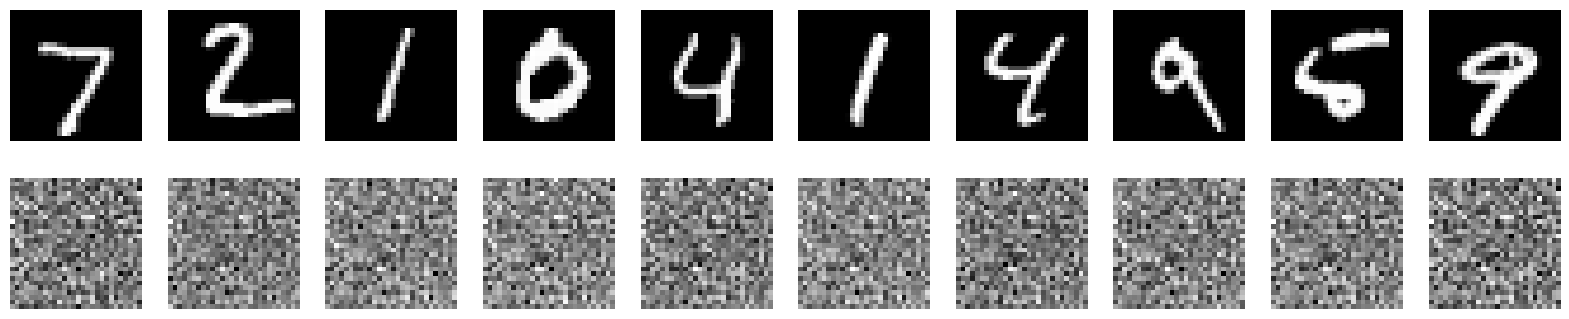

In [ ]:
# prompt: visualize the reconstucted images using complete stacked ae
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_stacked = Input(shape=(784,))
encoded1_stacked = Dense(128, activation='relu')(input_stacked)
encoded2_stacked = Dense(64, activation='relu')(encoded1_stacked)
encoded3_stacked = Dense(32, activation='relu')(encoded2_stacked)
decoded_stacked1 = Dense(64, activation='relu')(encoded3_stacked)
decoded_stacked2 = Dense(128, activation='relu')(decoded_stacked1)
decoded_stacked3 = Dense(784, activation='sigmoid')(decoded_stacked2)

# Create the stacked autoencoder model
stacked_autoencoder = Model(input_stacked, decoded_stacked3)
decoded_imgs = stacked_autoencoder.predict(x_test)
# Compile the stacked autoencoder
stacked_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i +1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    plt.axis('off')

    # Display reconstruction
    # Predict using the stacked autoencoder and reshape
    decoded_img = stacked_autoencoder.predict(x_test[i].reshape(1, 784)).reshape(28, 28)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img, cmap='gray') # Display the decoded image
    plt.axis('off')

plt.show()

(-0.5, 27.5, 27.5, -0.5)

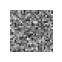

In [ ]:
# prompt: display reconstruction
ax= plt.subplot(2,n,i+1)
plt.imshow(decoded_imgs[i].reshape(28,28),cmap='gray')
plt.axis('off')